In [1]:
#Import The Necessary Library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
#Load The Dataset That is on .excel FIle 
data=pd.read_csv('/content/data_banknote_authentication.txt',header=None)

In [6]:
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [46]:
data.columns = ['var', 'skew', 'curt', 'entr', 'auth']
#The variance of the image transformed into wavelets
#The asymmetry of the image transformed into wavelets
#Kurtosis of the image transformed into wavelets
#Image entropy
#The target value is simply 0 for real banknotes and 1 for fake banknotes

In [8]:
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,var,skew,curt,entr,auth
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
#Tail() Is Used the Show the first 5 Rows Of the Dataset 
data.tail()

,var,skew,curt,entr,auth
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [10]:
#Check The Shape Of The Dataset 
data.shape

(1372, 5)

In [11]:
data.dtypes

var     float64
skew    float64
curt    float64
entr    float64
auth      int64
dtype: object

In [12]:
data.isnull().sum()

var     0
skew    0
curt    0
entr    0
auth    0
dtype: int64

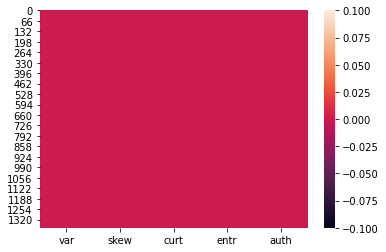

In [13]:
sns.heatmap(data.isnull())

In [14]:
Float = data.select_dtypes(include = ["float64"]).keys()
Float

Index(['var', 'skew', 'curt', 'entr'], dtype='object')

In [15]:
data[Float].describe()#Describe the dataset Column Value 

,var,skew,curt,entr
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [17]:
Numerical = data.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['auth'], dtype='object')

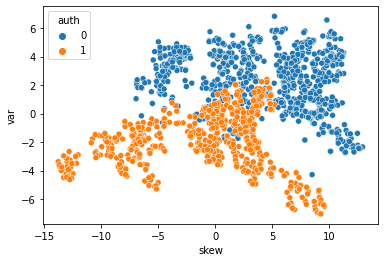

In [18]:
sns.scatterplot(x='skew',y='var',hue='auth',data=data)

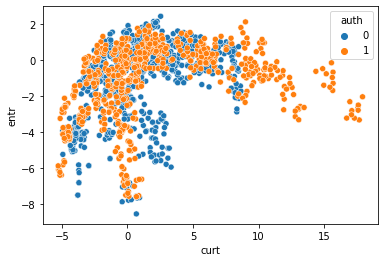

In [19]:
sns.scatterplot(x='curt',y='entr',hue='auth',data=data)

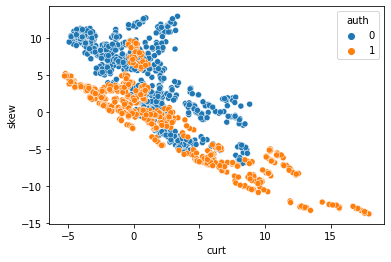

In [20]:
sns.scatterplot(x='curt',y='skew',hue='auth',data=data)

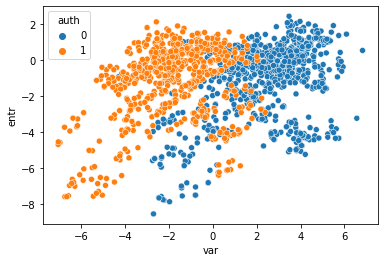

In [21]:
sns.scatterplot(x='var',y='entr',hue='auth',data=data)

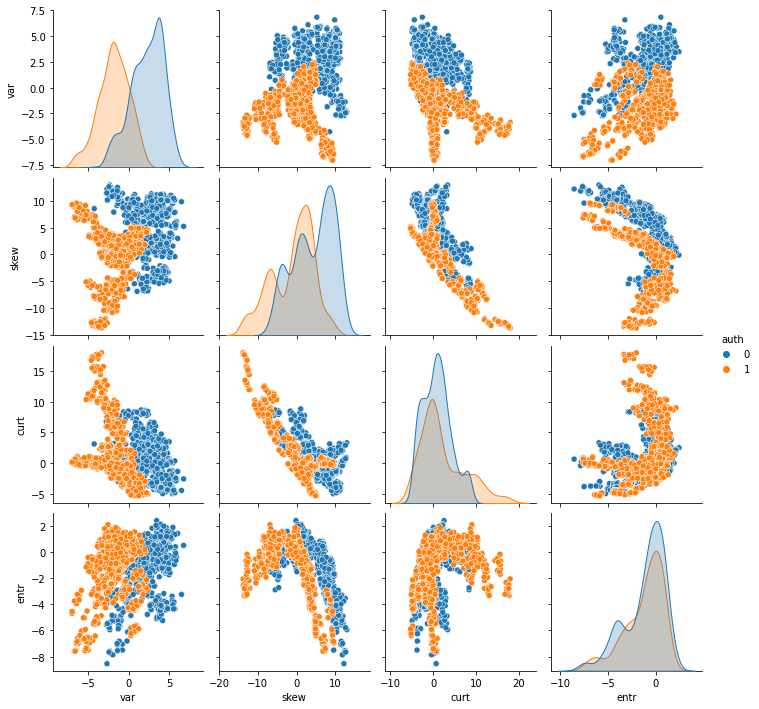

In [22]:
#pair diagram to get an overview of the relationship between all the entities.
sns.pairplot(data, hue='auth')
plt.show()

In [23]:
data.auth.value_counts()
#data is balanced against the target values:

0    762
1    610
Name: auth, dtype: int64

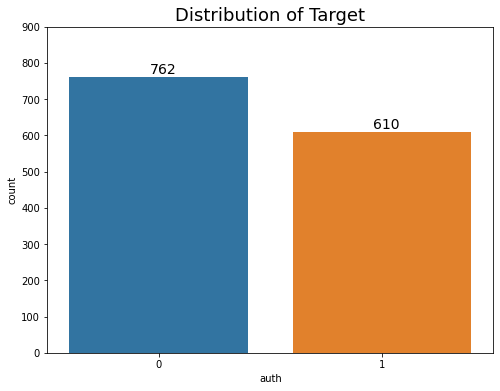

In [24]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

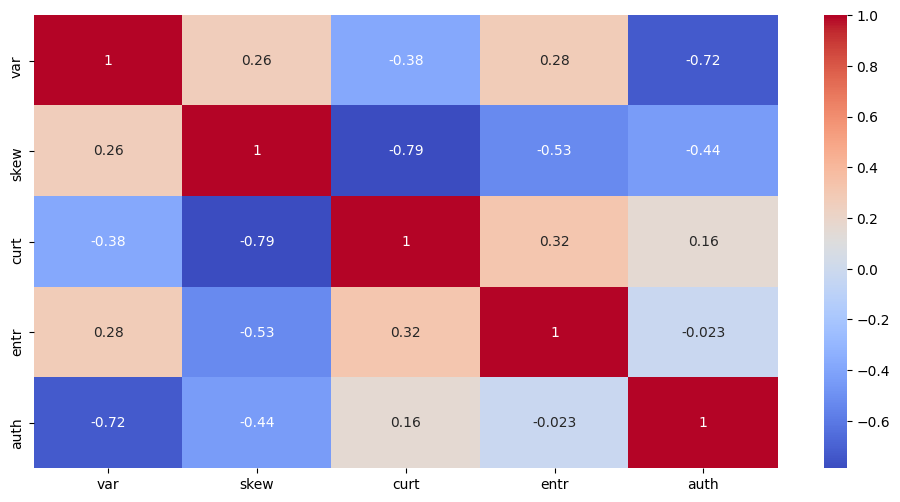

In [25]:
#Check the Correlation between columns 
corr_df = data.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

In [26]:
#randomly deleting 152 observations of actual banknotes:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='auth')
data = data[nb_to_delete:]
print(data['auth'].value_counts())

1    610
0    610
Name: auth, dtype: int64


In [27]:
data.columns

Index(['var', 'skew', 'curt', 'entr', 'auth'], dtype='object')

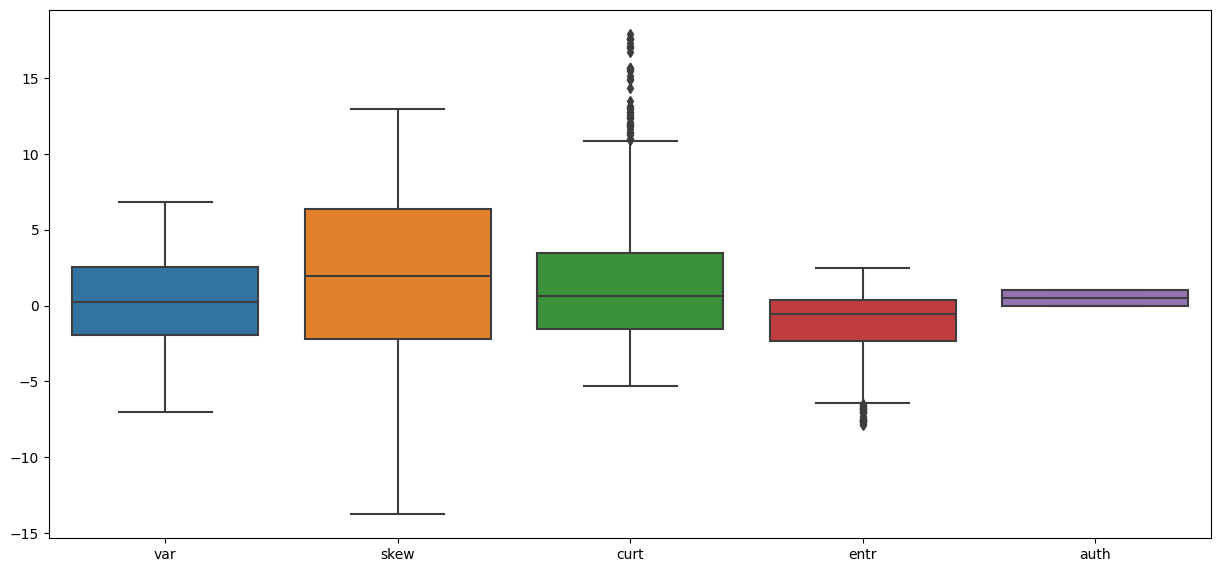

In [28]:
#Usnig the Box plot 
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = data[['var', 'skew', 'curt', 'entr', 'auth']])

In [36]:
x = data.loc[:, data.columns != 'auth']
y = data.loc[:, data.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=5)
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
pred=lr.predict(x_test)#Pred
print(' prediction \n',pred)#Print Prediction Value 
lr=print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1
 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0
 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0]
accuracy score
 0.9836065573770492
confusion metrix
 [[187   0]
 [  6 173]]
classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       187
           1       1.00      0.97 

In [41]:
from sklearn.naive_bayes import GaussianNB 
gn=GaussianNB()
gn.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
pred=gn.predict(x_test)
print(' prediction \n',pred)
print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1
 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1
 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0
 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1
 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0]
accuracy score
 0.8524590163934426
confusion metrix
 [[173  34]
 [ 20 139]]
classification Report 
               precision    recall  f1-score   support

           0       0.90      0.84      0.86       207
           1       0.80      0.87 

In [43]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
pred=svc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
svc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0
 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0
 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0
 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0]
accuracy score
 1.0
confusion metrix
 [[193   0]
 [  0 173]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00      

In [45]:
from sklearn.externals import joblib
joblib.dump(data,'Currency.pkl')

['Currency.pkl']